In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random

import sklearn.linear_model as lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

2. (40 points total) In Chapter 4, we used logistic regression to predict the probability of default using
income and balance on the Default data set. We will now estimate the test error of this logistic
regression model using the validation set approach. Do not forget to set a random seed before beginning
your analysis.

Random state is set in the model fit

In [3]:
df = pd.read_csv('~/Documents/UMKC/Fall_2018/Statistical_Learning/Default.csv')
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [4]:
df = df[['default', 'student', 'balance', 'income']]
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head()

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


(a) (10 points) Fit a logistic regression model that uses income and balance to predict default

Saga was the recommended solver to use, not sure how it compares to R

In [5]:
X_train = df[['balance', 'income']]
y = df.default2
model = lm.LogisticRegression(solver='saga',random_state=1,fit_intercept=True,max_iter=1000)
mod = model.fit(X_train, y)
mod.intercept_,mod.coef_

(array([-7.69680023e-06]), array([[ 0.00040712, -0.00012586]]))

(b) (10 points total) Using the validation set approach, estimate the test error of this model. In order
to do this, you must perform the following steps:

i. (2.5 points) Split the sample set into a training set and a validation set.

70:30 split

In [6]:
X_train = df.loc[:7000][['balance', 'income']]
y_train = df.loc[:7000]['default2']

X_test = df.loc[7000:][['balance', 'income']]
y_test = df.loc[7000:]['default2']

In [7]:
X_test.describe()

,balance,income
count,3000.000000,3000.000000
mean,837.430908,33436.248891
std,485.515271,13405.504187
min,0.000000,1498.227274
25%,486.081912,21371.070094
50%,826.734334,34379.089561
75%,1167.958696,43681.616410
max,2654.322576,72461.301392


ii. (2.5 points) Fit a multiple logistic regression model using only the training observations.

In [8]:
lr = model.fit(X_train, y_train)
lr.intercept_,lr.coef_

(array([-7.23243279e-06]), array([[ 0.00042502, -0.00012534]]))

iii. (2.5 points) Obtain a prediction of default status for each individual in the validation set
by computing the posterior probability of default for that individual, and classifying the
individual to the default category if the posterior probability is greater than 0.5.

In [9]:
prob = lr.predict_proba(X_test)
prob

array([[9.75279316e-01, 2.47206840e-02],
       [9.46201459e-01, 5.37985412e-02],
       [5.02196731e-01, 4.97803269e-01],
       ...,
       [9.99080011e-01, 9.19989152e-04],
       [9.80721628e-01, 1.92783716e-02],
       [8.83730086e-01, 1.16269914e-01]])

Predict function sets its threshold ad 0.5

In [10]:
pred = lr.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

iv. (2.5 points) Compute the validation set error, which is the fraction of the observations in the
validation set that are misclassified.

In [11]:
confusion_matrix(pred, y_test)

array([[2905,   93],
       [   2,    0]])

95/3000 = 3.1%

(c) (10 points) Repeat the process in (b) three times, using three different splits of the observations
into a training set and a validation set. Comment on the results obtained.

In [12]:
X_train = df.loc[:5000][['balance', 'income']]
y_train = df.loc[:5000]['default']

X_test = df.loc[5000:][['balance', 'income']]
y_test = df.loc[5000:]['default']
pred = model.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, pred)

array([[4839,    3],
       [ 158,    0]])

161/5000 = 3.2%

In [13]:
X_train = df.loc[:9000][['balance', 'income']]
y_train = df.loc[:9000]['default']

X_test = df.loc[9000:][['balance', 'income']]
y_test = df.loc[9000:]['default']
pred = model.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, pred)

array([[963,   1],
       [ 36,   0]])

37/1000 = 3.7%

In [14]:
X_train = df.loc[:3000][['balance', 'income']]
y_train = df.loc[:3000]['default']

X_test = df.loc[3000:][['balance', 'income']]
y_test = df.loc[3000:]['default']
pred = model.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, pred)

array([[6765,    3],
       [ 232,    0]])

235/7000 = 3.35%

Overall the test errors are fairly low. However, it is almost exclusively predicts a "no" default status.

(d) (10 points) Now consider a logistic regression model that predicts the probability of default using
income, balance, and a dummy variable for student. Estimate the test error for this model using
the validation set approach. Comment on whether or not including a dummy variable for student
leads to a reduction in the test error rate.

In [15]:
X_train = df.loc[:7000][['balance', 'income', 'student2']]
y_train = df.loc[:7000]['default']

X_test = df.loc[7000:][['balance', 'income', 'student2']]
y_test = df.loc[7000:]['default']
pred = model.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, pred)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[2905,    2],
       [  93,    0]])

It did not affect the predictions

3. (40 points) We continue to consider the use of a logistic regression model to predict the probability
of default using income and balance on the Default data set. In particular, we will now compute
estimates for the standard errors of the income and balance logistic regression coefficients in two
different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard
errors in the glm() function. Do not forget to set a random seed before beginning your analysis.

(a) (10 points) Using the summary() and glm() functions, determine the estimated standard errors
for the coefficients associated with income and balance in a multiple logistic regression model
that uses both predictors.

In [16]:
np.random.seed(1)

In [17]:
x = df[['balance', 'income']]
formula = 'default2~' + '+'.join(x)
formula

'default2~balance+income'

In [19]:
mod1 = smf.glm(formula=formula, data=df, family=sm.families.Binomial()).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               default2   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Fri, 02 Nov 2018   Deviance:                       1579.0
Time:                        17:52:08   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================
"""

In [20]:
mod1.params

Intercept   -11.540468
balance       0.005647
income        0.000021
dtype: float64

(b) (10 points)Write a function, boot.fn(), that takes as input the Default data set as well as an
index of the observations, and that outputs the coefficient estimates for income and balance in
the multiple logistic regression model.

In [21]:
from sklearn.utils import resample
def boot_fn(data, start_index, end_index):
    data = data[start_index:end_index]
    x = df[['balance', 'income']]
    formula = 'default2~' + '+'.join(x)
    m = smf.glm(formula=formula, data=data, family=sm.families.Binomial()).fit()
    
    return m.params

(c) (10 points) Use the boot() function together with your boot.fn() function to estimate the
standard errors of the logistic regression coefficients for income and balance.

In [22]:
bs_boot = {'t1': [], 't2': [], 't3': []}

for i in range(0, 1000):
    bs_boot['t1'].append(
        boot_fn(resample(df, replace=True, n_samples=10000), 0, 10000)[0]
    )
    bs_boot['t2'].append(
        boot_fn(resample(df, replace=True, n_samples=10000), 0, 10000)[1]
    )
    bs_boot['t3'].append(
        boot_fn(resample(df, replace=True, n_samples=10000), 0, 10000)[2]
    )


t1_es = np.array(bs_boot['t1']).mean()
t1_se = np.array(bs_boot['t1']).std()
t2_es = np.array(bs_boot['t2']).mean()
t2_se = np.array(bs_boot['t2']).std()
t3_es = np.array(bs_boot['t3']).mean()
t3_se = np.array(bs_boot['t3']).std()

print('t1 bs estimate & se:', t1_es, t1_se)
print('t2 bs estimate & se:', t2_es, t2_se)
print('t3 bs estimate & se:', t3_es, t3_se)

t1 bs estimate & se: -11.556093518335382 0.444513142168029
t2 bs estimate & se: 0.005668553948050877 0.00022583738436018184
t3 bs estimate & se: 2.0884663317845846e-05 5.007199103022036e-06


(d) (10 points) Comment on the estimated standard errors obtained using the glm() function and
using your bootstrap function.

Findings from the bootstrap sample are very similar to those from the glm function. 

5. (30 points total) In this exercise, we will generate simulated data, and will then use this data to perform
best subset selection.

(a) (5 points) Use the rnorm() function to generate a predictor X of length n = 100, as well as a
noise vector ϵ of length n = 100.

In [23]:
n = 100
np.random.seed(1)
ran = pd.DataFrame()
ran['x'] = np.random.randn(n)
ran['noise'] = np.random.randn(n)

In [24]:
ran.head()

,x,noise
0,1.624345,-0.447129
1,-0.611756,1.224508
2,-0.528172,0.403492
3,-1.072969,0.593579
4,0.865408,-1.094912


(b) (5 points) Generate a response vector Y of length n = 100 according to the model
Y = β0 + β1X + β2X2 + β3X3 + ϵ,
where β0, β1, β2, and β3 are constants of your choice.

In [25]:
B0 = 6.5
B1 = 3.2
B2 = 7.9
B3 = 4.2
def y(x, noise):
    Y = B0 + B1*x + B2*x**2 + B3*x**3 + noise
    return Y

In [26]:
for index, row in ran.iterrows():
   ran['Y'] = y(ran.x, ran.noise)

In [27]:
ran.head()

,x,noise,Y
0,1.624345,-0.447129,50.095403
1,-0.611756,1.224508,7.761851
2,-0.528172,0.403492,6.798334
3,-1.072969,0.593579,7.566922
4,0.865408,-1.094912,16.813089


(c) (5 points) Use the regsubsets() function to perform best subset selection in order to choose the
best model containing the predictors X, X2
, . . . , X10. What is the best model obtained according
to Cp, BIC, and adjusted R2
? Show some plots to provide evidence for your answer, and report
the coefficients of the best model obtained. Note you will need to use the data.frame() function
to create a single data set containing both X and Y .

In [28]:
from itertools import chain, combinations

In [29]:
for index, row in ran.iterrows():
    for i in range (2,11):
        ran[i] = ran.x ** i

In [30]:
ran.head()

,x,noise,Y,2,3,4,5,6,7,8,9,10
0,1.624345,-0.447129,50.095403,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,127.874436
1,-0.611756,1.224508,7.761851,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,0.007342
2,-0.528172,0.403492,6.798334,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,0.001689
3,-1.072969,0.593579,7.566922,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415
4,0.865408,-1.094912,16.813089,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,0.235617


In [31]:
ran.columns

Index(['x', 'noise', 'Y', 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='object')

In [32]:
X = ran[['x', 2, 3, 4, 5, 6, 7, 8, 9, 10]]
y = ran.Y
##acknowledging https://github.com/jcrouser for the following functions
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [33]:
X.head()

,x,2,3,4,5,6,7,8,9,10
0,1.624345,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,127.874436
1,-0.611756,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,0.007342
2,-0.528172,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,0.001689
3,-1.072969,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415
4,0.865408,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,0.235617


In [34]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [35]:
import time
import itertools

In [36]:
# Could take quite awhile to complete...

models = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,11):
    models.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  10 models on 1 predictors in 0.030070066452026367 seconds.
Processed  45 models on 2 predictors in 0.0931088924407959 seconds.
Processed  120 models on 3 predictors in 0.2187941074371338 seconds.
Processed  210 models on 4 predictors in 0.38736391067504883 seconds.
Processed  252 models on 5 predictors in 0.4405529499053955 seconds.
Processed  210 models on 6 predictors in 0.3860187530517578 seconds.
Processed  120 models on 7 predictors in 0.19060230255126953 seconds.
Processed  45 models on 8 predictors in 0.08617973327636719 seconds.
Processed  10 models on 9 predictors in 0.019213199615478516 seconds.
Processed  1 models on 10 predictors in 0.0035681724548339844 seconds.
Total elapsed time: 1.8791790008544922 seconds.


Text(0,0.5,'BIC')

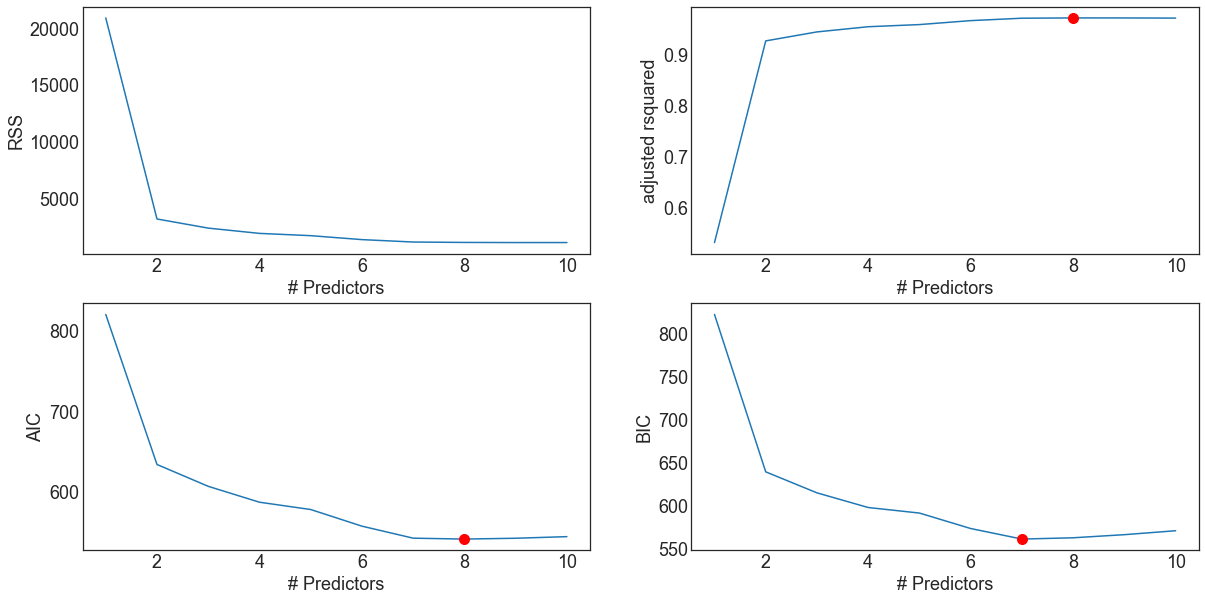

In [37]:

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

According to these plots it appears that 7-8 predictors is the ideal model. Under the one-standard error rule we will report 7.

In [38]:
print(models.loc[7, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     503.5
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           5.34e-71
Time:                        17:56:58   Log-Likelihood:                -264.29
No. Observations:                 100   AIC:                             542.6
Df Residuals:                      93   BIC:                             560.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.9888      0.722      4.138      0.0

(d) (5 points) Repeat (c), using forward stepwise selection and also using backwards stepwise selection.
How does your answer compare to the results in (c)?

In [39]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [40]:

models2 = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models2.loc[i] = forward(predictors)
    predictors = models2.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  10 models on 1 predictors in 0.03168010711669922 seconds.
Processed  9 models on 2 predictors in 0.028456926345825195 seconds.
Processed  8 models on 3 predictors in 0.019555091857910156 seconds.
Processed  7 models on 4 predictors in 0.01485586166381836 seconds.
Processed  6 models on 5 predictors in 0.014323949813842773 seconds.
Processed  5 models on 6 predictors in 0.010715246200561523 seconds.
Processed  4 models on 7 predictors in 0.009351015090942383 seconds.
Processed  3 models on 8 predictors in 0.006722927093505859 seconds.
Processed  2 models on 9 predictors in 0.005316257476806641 seconds.
Processed  1 models on 10 predictors in 0.0032958984375 seconds.
Total elapsed time: 0.1646718978881836 seconds.


Text(0,0.5,'BIC')

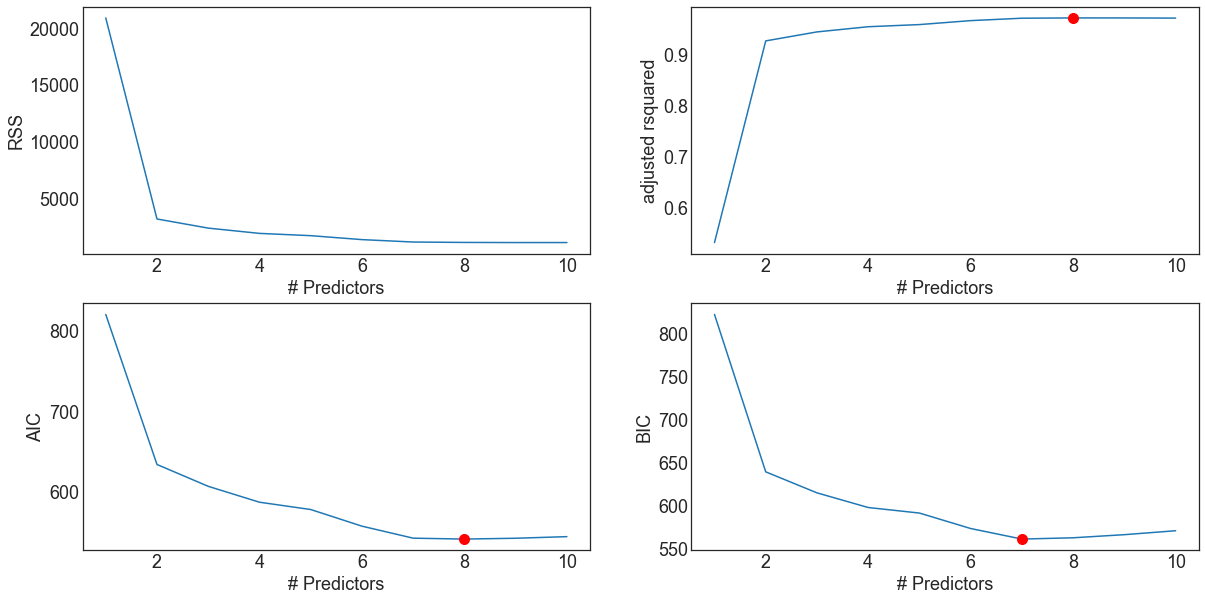

In [41]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models2["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models2.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models2.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models2.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

Similar results, again 7 predictors will be reported.

In [42]:
print(models2.loc[7, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     503.5
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           5.34e-71
Time:                        17:59:17   Log-Likelihood:                -264.29
No. Observations:                 100   AIC:                             542.6
Df Residuals:                      93   BIC:                             560.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2             42.8869      3.361     12.759      0.0

In [43]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [44]:

models3 = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models3.loc[len(predictors)-1] = backward(predictors)
    predictors = models3.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  10 models on 9 predictors in 0.028300046920776367 seconds.
Processed  9 models on 8 predictors in 0.027920961380004883 seconds.
Processed  8 models on 7 predictors in 0.019359350204467773 seconds.
Processed  7 models on 6 predictors in 0.015183687210083008 seconds.
Processed  6 models on 5 predictors in 0.013155937194824219 seconds.
Processed  5 models on 4 predictors in 0.01133108139038086 seconds.
Processed  4 models on 3 predictors in 0.009132146835327148 seconds.
Processed  3 models on 2 predictors in 0.007155895233154297 seconds.
Processed  2 models on 1 predictors in 0.004760026931762695 seconds.
Total elapsed time: 0.142838716506958 seconds.


Text(0,0.5,'BIC')

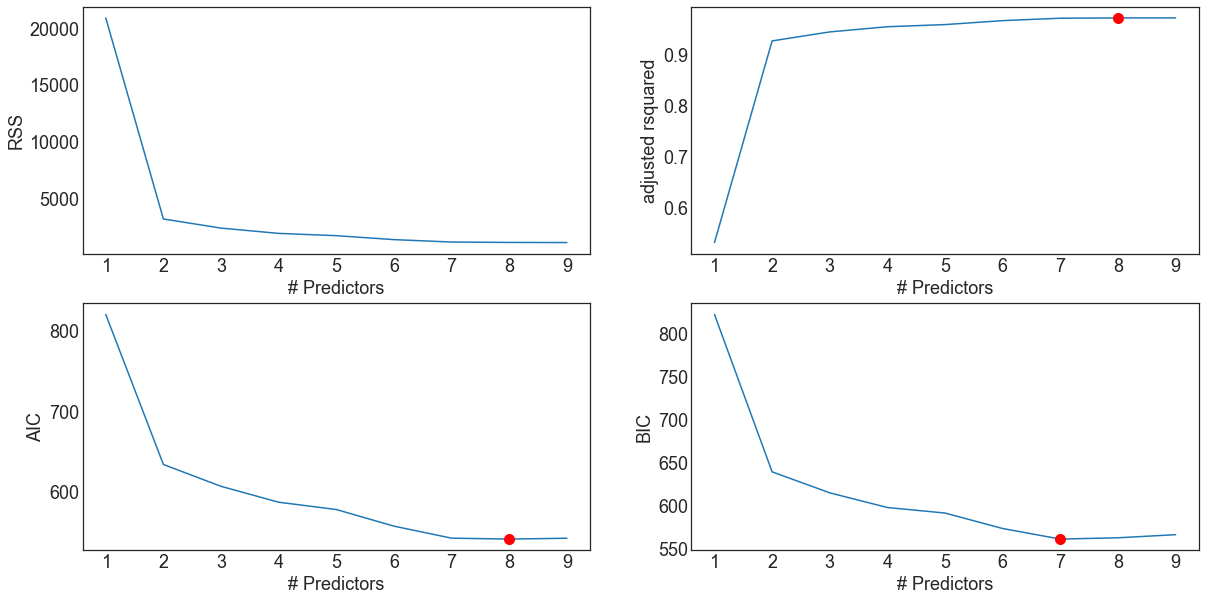

In [45]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models3["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models3.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models3.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models3.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

Again 7 appears to be the best across the various test statistics

In [46]:
print(models3.loc[7, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     503.5
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           5.34e-71
Time:                        18:01:25   Log-Likelihood:                -264.29
No. Observations:                 100   AIC:                             542.6
Df Residuals:                      93   BIC:                             560.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.9888      0.722      4.138      0.0

Through the tested number of features they have selected the same features

 (5 points) Now fit a lasso model to the simulated data, again using X, X2
, . . . , X10 as predictors.
Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as
a function of λ. Report the resulting coefficient estimates, and discuss the results obtained.

In [47]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

Set an alpha vector

In [48]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Text(0,0.5,'weights')

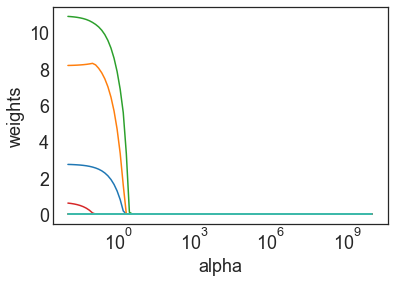

In [49]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Text(0,0.5,'mse')

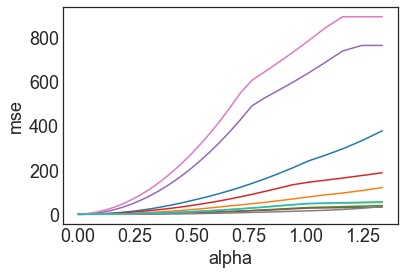

In [50]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X, y)
ax = plt.gca()
ax.plot(lassocv.alphas_, lassocv.mse_path_)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('mse')

In [51]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, y)

Lasso(alpha=0.0016491675892195434, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

x     3.108273
2     7.398639
3     4.294584
4     0.107225
5     0.000000
6     0.004228
7     0.000000
8     0.000000
9     0.000000
10    0.000000
dtype: float64

A small value of alpha was chosen suggesting that little restricition was needed. However, only 4 predictors were not shrunk to zero.

(f) (5 points)Now generate a response vector Y according to the model
Y = β0 + β7X7 + ϵ,
and perform best subset selection and the lasso. Discuss the results obtained.

In [53]:
B7 = 6.9
def newy(x, noise):
    Y = B0 + B7*x**7 + noise
    return Y
for index, row in ran.iterrows():
   ran['newY'] = newy(ran.x, ran.noise)

ran.head()

,x,noise,Y,2,3,4,5,6,7,8,9,10,newY
0,1.624345,-0.447129,50.095403,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,127.874436,211.925070
1,-0.611756,1.224508,7.761851,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,0.007342,7.503250
2,-0.528172,0.403492,6.798334,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,0.001689,6.824374
3,-1.072969,0.593579,7.566922,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415,-4.203294
4,0.865408,-1.094912,16.813089,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,0.235617,7.913473


In [54]:
# Could take quite awhile to complete...
y = ran.newY
models = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,11):
    models.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  10 models on 1 predictors in 0.030234813690185547 seconds.
Processed  45 models on 2 predictors in 0.09446191787719727 seconds.
Processed  120 models on 3 predictors in 0.20895624160766602 seconds.
Processed  210 models on 4 predictors in 0.36774277687072754 seconds.
Processed  252 models on 5 predictors in 0.4454529285430908 seconds.
Processed  210 models on 6 predictors in 0.3982717990875244 seconds.
Processed  120 models on 7 predictors in 0.35068583488464355 seconds.
Processed  45 models on 8 predictors in 0.09157109260559082 seconds.
Processed  10 models on 9 predictors in 0.020914077758789062 seconds.
Processed  1 models on 10 predictors in 0.0038268566131591797 seconds.
Total elapsed time: 2.0380680561065674 seconds.


Text(0,0.5,'BIC')

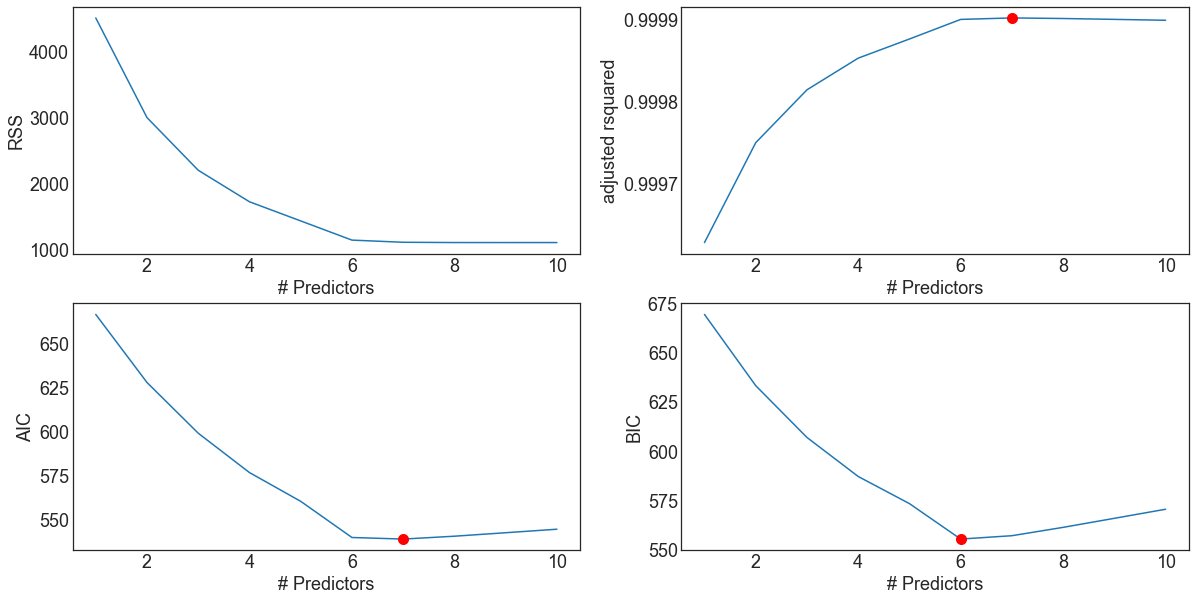

In [55]:

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

Using the one-standard error approach here 6 is determined as being the optimal number of predictors by best subset.

In [56]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X, y)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, y)
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

x    -0.000000
2    -0.000000
3     0.000000
4     0.000000
5     1.515089
6     0.000000
7     6.147753
8     0.000000
9     0.088748
10    0.000000
dtype: float64

Interesting results, in this scenario the subset selection methods determined that around 6-8 predictors would still result in the smallst test MSE. However, lasso reduced all but 3 coefficients to zero.

In [57]:
print(models.loc[3, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                   newY   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.797e+05
Date:                Fri, 02 Nov 2018   Prob (F-statistic):          1.87e-181
Time:                        18:12:44   Log-Likelihood:                -296.56
No. Observations:                 100   AIC:                             599.1
Df Residuals:                      97   BIC:                             606.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2              7.9270      0.924      8.577      0.0

In fact they did not even select the same predictors

6. (35 points total) In this exercise, we will predict the number of applications received using the other
variables in the College data set.

In [58]:
college = pd.read_csv('~/Documents/UMKC/Fall_2018/Statistical_Learning/Lab1/college.csv')

(a) (5 points) Split the data set into a training set and a test set.

In [59]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [60]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [61]:
college.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [62]:
college['Fundergrad'] = college['F.Undergrad']
college['Pundergrad'] = college['P.Undergrad']
college['RoomBoard'] = college['Room.Board']
college['SFRatio'] = college['S.F.Ratio']
college['PercAlumni'] = college['perc.alumni']
college['GradRate'] = college['Grad.Rate']

In [63]:
cols = ['Private', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'Fundergrad', 'Pundergrad', 'Outstate', 'RoomBoard', 'Books',
       'Personal', 'PhD', 'Terminal', 'SFRatio', 'PercAlumni', 'Expend',
       'GradRate']

In [64]:
X_train = college.loc[:400]
y_train = college.loc[:400]

X_test = college.loc[400:][cols]
y_test = college.loc[400:][['Apps']]

(b) (5 points) Fit a linear model using least squares on the training set, and report the test error
obtained.

In [65]:
columns_selected = "+".join(college[cols])
my_formula = "Apps~" + columns_selected
my_formula

'Apps~Private+Accept+Enroll+Top10perc+Top25perc+Fundergrad+Pundergrad+Outstate+RoomBoard+Books+Personal+PhD+Terminal+SFRatio+PercAlumni+Expend+GradRate'

In [66]:
lm_fit = smf.ols(formula=my_formula, data=X_train).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     220.8
Date:                Fri, 02 Nov 2018   Prob (F-statistic):          6.78e-186
Time:                        18:14:20   Log-Likelihood:                -3275.2
No. Observations:                 401   AIC:                             6586.
Df Residuals:                     383   BIC:                             6658.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -701.1681    470.860     -1.489      0.137   -1626.962     224.626
Private[T.Yes]  -462.0870    171.035     -2.702      0.007    -798.371    -125.803
Accept             1.2121      0.077     15.680      0.000       1.060       1.364
Enroll             0.0644      0.274      0.235      0.814      -0.474       0.602
Top10perc         41.4833      6.778      6.120      0.000      28.157      54.810
Top25perc        -14.6514      5.468     -2.680      0.008     -25.402      -3.901
Fundergrad         0.0318      0.043      0.744      0.457      -0.052       0.116
Pundergrad         0.0074      0.055      0.135      0.892      -0.101       0.116
Outstate          -0.0279      0.022     -1.248      0.213      -0.072       0.016
RoomBoard          0.1795      0.056      3.186      0.002       0.069       0.290
Books             -0.2084      0.254     -0.822      0.411      -0.707       0.290
Personal           0.1067      0.080      1.332      0.184      -0.051       0.264
PhD                1.1197      5.968      0.188      0.851     -10.614      12.853
Terminal         -11.2276      6.603     -1.700      0.090     -24.211       1.756
SFRatio           11.8040     14.707      0.803      0.423     -17.112      40.720
PercAlumni        -5.7703      4.852     -1.189      0.235     -15.310       3.769
Expend             0.0840      0.014      6.057      0.000       0.057       0.111
GradRate           7.4521      3.370      2.211      0.028       0.826      14.078
==============================================================================
Omnibus:                      291.652   Durbin-Watson:                   2.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6073.239
Skew:                           2.814   Prob(JB):                         0.00
Kurtosis:                      21.216   Cond. No.                     1.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
pred = lm_fit.predict(X_test)
mean_squared_error(pred, y_test)

1753282.5647025076

(c) (5 points) Fit a ridge regression model on the training set, with λ chosen by cross-validation.
Report the test error obtained.

In [69]:
college['Private'] = pd.get_dummies(college[['Private']], drop_first=True)

In [70]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Fundergrad,Pundergrad,RoomBoard,SFRatio,PercAlumni,GradRate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,...,18.1,12,7041,60,2885,537,3300,18.1,12,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,...,12.2,16,10527,56,2683,1227,6450,12.2,16,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,...,12.9,30,8735,54,1036,99,3750,12.9,30,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,...,7.7,37,19016,59,510,63,5450,7.7,37,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,...,11.9,2,10922,15,249,869,4120,11.9,2,15


In [71]:
X = college[cols]
X.head()

,Private,Accept,Enroll,Top10perc,Top25perc,Fundergrad,Pundergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,PercAlumni,Expend,GradRate
0,1,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [72]:
y = college['Apps']
ridge = Ridge(normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 17)

Text(0,0.5,'weights')

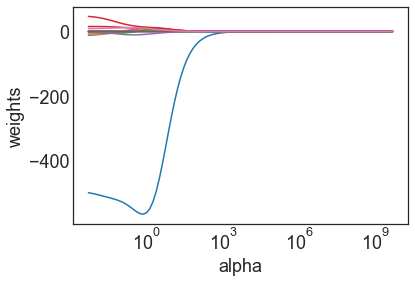

In [73]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [74]:
X_train = college.loc[:400][cols]
y_train = college.loc[:400]['Apps']

X_test = college.loc[400:][cols]
y_test = college.loc[400:][['Apps']]

In [75]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.005

In [76]:
ridge4 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

1842734.4549547166

(d) (5 points) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test
error obtained, along with the number of non-zero coefficient estimates.

In [77]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

1766069.5686688705

In [78]:
pd.Series(lasso.coef_, index=X.columns)

Private      -467.756518
Accept          1.204621
Enroll          0.090039
Top10perc      38.595249
Top25perc     -12.172482
Fundergrad      0.029417
Pundergrad      0.004383
Outstate       -0.022713
RoomBoard       0.169452
Books          -0.168630
Personal        0.101848
PhD             0.000000
Terminal       -9.783554
SFRatio        10.070839
PercAlumni     -5.640389
Expend          0.082312
GradRate        6.765903
dtype: float64

16 predictors of 17 had non-zero coefficients

(e) (5 points) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the
test error obtained, along with the value of M selected by cross-validation.

In [79]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn import cross_validation

In [80]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

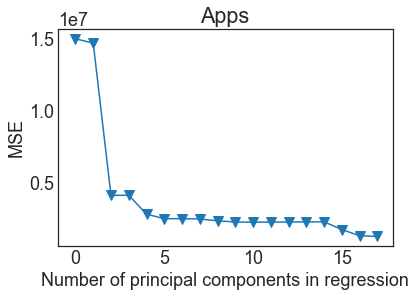

In [82]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 17 principle components, adding one component at the time.
for i in np.arange(1, 18):
    score = -1*cross_validation.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Apps')
plt.xlim(xmin=-1);

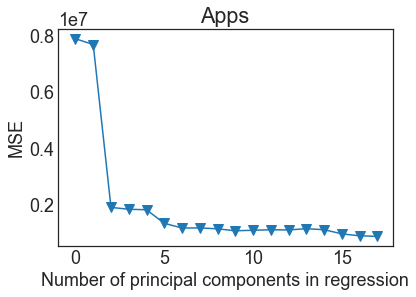

In [83]:
pca2 = PCA()

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 17 principle components, adding one component at the time.
for i in np.arange(1, 18):
    score = -1*cross_validation.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Apps')
plt.xlim(xmin=-1);

In [84]:
X_reduced_test = pca2.transform(scale(X_test))[:,:16]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:16], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

7253423.965108147

Inclusion of 16 principal components appears to result in the smallest MSE

(f) (5 points) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the
test error obtained, along with the value of M selected by cross-validation.

(-1, 17.8)

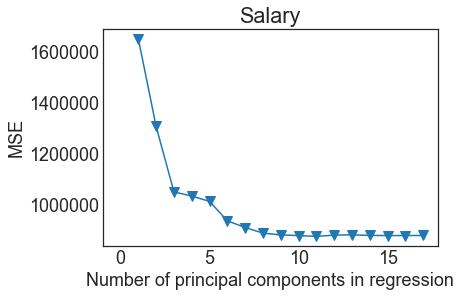

In [85]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 18):
    pls = PLSRegression(n_components=i)
    score = cross_validation.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 18), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

Cross validation indicates that approximately 15-16 prinicpal components results in the lowest MSE. However, this value appears to level out at about 10 principal components

In [86]:
pls = PLSRegression(n_components=16)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

6995228.886311562

(g) (5 points) Comment on the results obtained. How accurately can we predict the number of college
applications received? Is there much difference among the test errors resulting from these five
approaches?

Yes, there appears to be a great deal of difference in the test MSE across models with increasing test MSE as the flexibility of the model is reduced. The large number of pricipal components in PCR/PLS and the low lambda values in the ridge/lasso regression methods suggest that many of these predictors are most likely important in determining the number of applications. This would explain why the simple OLS linear regression resulted in the lowest test MSE. The other models increase in bias was not offset by the decreased variance. In fact, the less flexible model we used, the test MSEs got worse. 